In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_file_path = "../content/drive/MyDrive/Colab Notebooks/coll_lb_single_house.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

<ipython-input-3-a3f4304f10b9>:2: DtypeWarning: Columns (4,35,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv(train_file_path)


Full train dataset shape is (274196, 132)


In [4]:
dataset_df.head(3)

,CLP,YEAR,COLL_ID,DOCUMENT_TYPE_DESC,DOCUMENT_NO,BUILDING_STYLE_DESC,PROJECT_ID,PROJECT_NAME,PROVINCE_NAME,DISTICT_NAME,...,CONVENIENCE_STORE_3KM_SHORTEST,DISCOUNT_STORE_3KM_SHORTEST,DEPARTMENT_STORE_3KM_SHORTEST,GAS_STATION_3KM_SHORTEST,MASS_TRANSIT_3KM_SHORTEST,EDUCATION_3KM_SHORTEST,BANK_3KM_SHORTEST,COFFEE_SHOP_3KM_SHORTEST,PHARMACY_3KM_SHORTEST,GOVERNMENT_OFFICE_3KM_SHORTEST
0,2482000,2020,1406643,โฉนด(Deed),183675,บ้านเดี่ยว,NaN,NaN,ระยอง,เมืองระยอง,...,1.373,1.996,0.0,1.301,0.0,1.666,2.810,1.314,0.0,0.967
1,4104400,2020,1404302,โฉนด(Deed),71425,บ้านเดี่ยว,NaN,NaN,นครปฐม,นครชัยศรี,...,2.733,2.845,0.0,2.588,0.0,1.838,2.758,2.713,0.0,1.505
2,1598000,2007,751626,โฉนด(Deed),91048,บ้านเดี่ยว,NaN,NaN,นครราชสีมา,เมืองนครราชสีมา,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
1. Drop unnecessary data column
2. Removing column with 50% null values


In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274196 entries, 0 to 274195
Columns: 132 entries, CLP to GOVERNMENT_OFFICE_3KM_SHORTEST
dtypes: float64(58), int64(8), object(66)
memory usage: 276.1+ MB


In [6]:
df_obj = dataset_df.select_dtypes(include = ['object'])
df_obj.info()
total_null_count = df_obj.isnull().sum().sum()
print("Total null values in df_obj:", total_null_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274196 entries, 0 to 274195
Data columns (total 66 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   DOCUMENT_TYPE_DESC              274196 non-null  object
 1   DOCUMENT_NO                     274196 non-null  object
 2   BUILDING_STYLE_DESC             274196 non-null  object
 3   PROJECT_ID                      34965 non-null   object
 4   PROJECT_NAME                    35801 non-null   object
 5   PROVINCE_NAME                   274196 non-null  object
 6   DISTICT_NAME                    274195 non-null  object
 7   SUBDISTICT_NAME                 273904 non-null  object
 8   LAND_POSITION_DESC              107983 non-null  object
 9   STREET                          243663 non-null  object
 10  SOI                             230592 non-null  object
 11  LAND_FILL_DESC                  260984 non-null  object
 12  ROAD_THROUGH_LAND_DESC        

In [7]:
dataset_df.drop([
        'COLL_ID','DOCUMENT_NO','PROJECT_ID','PROJECT_NAME','DISTICT_NAME','SUBDISTICT_NAME','STREET','SOI','LATITUDE','LONGITUDE','VILLAGE','PURCHASE_PRICE'
],
             axis=1,
             inplace=True)

In [8]:
dataset_df.info()
dataset_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274196 entries, 0 to 274195
Columns: 120 entries, CLP to GOVERNMENT_OFFICE_3KM_SHORTEST
dtypes: float64(58), int64(6), object(56)
memory usage: 251.0+ MB


(274196, 120)

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
df_new = dataset_df[(dataset_df['PROVINCE_NAME'] == 'กรุงเทพมหานคร') & (dataset_df['LAND_TYPE_DESC'] == 'จัดสรรโครงการเก่า')]

In [11]:
df_new.shape

(16086, 120)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16086 entries, 4 to 274191
Columns: 120 entries, CLP to GOVERNMENT_OFFICE_3KM_SHORTEST
dtypes: float64(58), int64(6), object(56)
memory usage: 14.8+ MB


In [13]:
df_new.head(10)

,CLP,YEAR,DOCUMENT_TYPE_DESC,BUILDING_STYLE_DESC,PROVINCE_NAME,WA,DEVELOPER_CIF,LAND_AREA,LAND_POSITION_DESC,DISTANCE,...,CONVENIENCE_STORE_3KM_SHORTEST,DISCOUNT_STORE_3KM_SHORTEST,DEPARTMENT_STORE_3KM_SHORTEST,GAS_STATION_3KM_SHORTEST,MASS_TRANSIT_3KM_SHORTEST,EDUCATION_3KM_SHORTEST,BANK_3KM_SHORTEST,COFFEE_SHOP_3KM_SHORTEST,PHARMACY_3KM_SHORTEST,GOVERNMENT_OFFICE_3KM_SHORTEST
4,5700000,2020,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,62,0,62.4,ถูกต้อง,3450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,5000000,2016,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,70,0,70.0,NaN,1360.0,...,0.194,0.205,0.990,0.998,0.0,0.268,0.362,0.433,0.875,0.803
110,3400000,2020,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,63,0,63.2,ถูกต้อง,550.0,...,0.489,2.987,0.000,1.010,0.0,0.666,2.172,0.823,2.195,1.685
123,4000000,2020,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,51,0,50.6,ถูกต้อง,180.0,...,0.581,0.643,2.406,1.407,0.0,0.936,0.694,1.243,2.430,1.959
126,2600000,2015,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,51,0,50.8,NaN,1180.0,...,0.809,1.791,0.000,0.985,0.0,1.174,1.696,2.009,1.818,1.328
138,2500000,2008,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,58,0,58.4,NaN,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,1250000,2020,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,23,0,23.1,ถูกต้อง,895.0,...,0.402,2.573,0.000,1.928,0.0,1.595,1.911,1.927,2.605,1.720
162,970000,2021,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,20,0,19.5,ถูกต้อง,980.0,...,0.584,1.486,0.000,0.983,0.0,0.224,0.798,1.630,0.000,0.269
228,1650000,2015,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,50,0,50.0,NaN,550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,13799757,2020,โฉนด(Deed),บ้านเดี่ยว,กรุงเทพมหานคร,0,0,100.0,ถูกต้อง,415.0,...,0.488,0.994,1.210,0.259,0.0,0.270,0.526,0.305,1.224,0.627


In [14]:
df_new.drop([
'BY_ROYAL_DECREE',
'NEED_TO_IMPROVE_WAY_CONDITIONS',
'POLLUTION_DESC',
'BUILDING_CONDITION_DESC',
'KINDERGARTEN_DESC',
'OUTDOOR_STADIUM_DESC',
'KEYCARD_DESC',
'CLUB_DESC',
'SECURITY_SYSTEM_DESC',
'WASTE_DISPOSAL_SYS_DESC',
'LAND_DIRECTION_DESC',
'URBAN_PLANNING_TERMS_DESC',
'PROJECT_REPUTATION',
'DEVELOPMENT_IN_AREA_DESC',
'PHYSICAL_APPEARANCE_DESC',
'LOCATION_DESC',
'LIQUIDITY_DESC',
'ENVIRONMENT_DESC',
'LAND_POSITION_DESC',
'CONSTRUCTION_SITE',
'LOCATE_IN_FOREST',
'EXPROPRIATION',
'ADDITIONAL_CONDITION',
'HOSPITAL_1KM_SHORTEST',
'BANK_1KM',
'COFFEE_SHOP_1KM',
'PHARMACY_1KM',
'DISCOUNT_STORE_1KM',
'EDUCATION_1KM',
'CONVENIENCE_STORE_1KM',
'MASS_TRANSIT_1KM',
'BANK_1KM_SHORTEST',
'GAS_STATION_1KM',
'MASS_TRANSIT_1KM_SHORTEST',
'GAS_STATION_1KM_SHORTEST',
'DEPARTMENT_STORE_1KM',
'DEPARTMENT_STORE_1KM_SHORTEST',
'DISCOUNT_STORE_1KM_SHORTEST',
'CONVENIENCE_STORE_1KM_SHORTEST',
'HOSPITAL_1KM',
'EDUCATION_1KM_SHORTEST',
'GOVERNMENT_OFFICE_3KM_SHORTEST',
'GOVERNMENT_OFFICE_1KM',
'MASS_TRANSIT_3KM',
'HOSPITAL_3KM_SHORTEST',
'CONVENIENCE_STORE_3KM_SHORTEST',
'DISCOUNT_STORE_3KM_SHORTEST',
'COFFEE_SHOP_1KM_SHORTEST',
'GOVERNMENT_OFFICE_3KM',
'PHARMACY_3KM',
'DEPARTMENT_STORE_3KM_SHORTEST',
'GAS_STATION_3KM_SHORTEST',
'COFFEE_SHOP_3KM',
'MASS_TRANSIT_3KM_SHORTEST',
'EDUCATION_3KM',
'BANK_3KM',
'GAS_STATION_3KM',
'CONVENIENCE_STORE_3KM',
'PHARMACY_1KM_SHORTEST',
'GOVERNMENT_OFFICE_1KM_SHORTEST',
'HOSPITAL_3KM',
'PHARMACY_3KM_SHORTEST',
'COFFEE_SHOP_3KM_SHORTEST',
'BANK_3KM_SHORTEST',
'EDUCATION_3KM_SHORTEST',
'DISCOUNT_STORE_3KM',
'DEPARTMENT_STORE_3KM'

],
             axis=1,
             inplace=True)

<ipython-input-14-3089c0413cdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop([


In [15]:
# Check for null values in each column
null_counts = df_new.isnull().sum()

# Sort the null_counts Series in descending order
sorted_null_counts = null_counts.sort_values()

# Display the column names and null counts in descending order
print("Column names and null counts in descending order:")
for column, null_count in sorted_null_counts.items():
    print(f"{column}: {null_count}")

Column names and null counts in descending order:
CLP: 0
PU_DRAIN: 0
PU_OTHER: 0
ELEC_UTILITY_ALONG_STREET_DISTANCE: 0
SPACE_IS_ENCROACHED: 0
WELLS_OF_AREA: 0
ESTIMATED_DEPTH: 0
PU_ROAD_LIGHT: 0
LAND_TYPE_DESC: 0
CONST_PROGRESS_PERC: 0
CONST_PROGRESS_PERC_ADDED: 0
BUILDING_AGE: 0
BUILDING_AREA: 0
MODEL_DESC: 0
NO_OF_FLOOR: 0
SECTIONS_SCALE_ENCROACH: 0
PU_WATER: 0
FIRE_INSUR_AREA: 0
LAND_FILL_AVERAGE: 0
BUILDING_STYLE_DESC: 0
PROVINCE_NAME: 0
PU_ELECTRIC: 0
WA: 0
DEVELOPER_CIF: 0
LAND_AREA: 0
DISTANCE: 0
YEAR: 0
DOCUMENT_TYPE_DESC: 0
PEDESTRIAN_ZONE: 0
ROAD_SURFACE_WITH: 0
STRUCTURE_DESC: 1
ROAD_THROUGH_LAND_DESC: 1
CAR_EXIST_DESC: 3
ENTRY_EXIST_DESC: 4
BUILDING_DESC: 5
CONSTRUCTION_TYPE_DESC: 5
RESIDENTIAL_USE: 5
ROOF_DESC: 6
ROOF_FRAME_DESC: 7
WALL_METERIAL_DESC: 7
ROAD_SURFACE_DESC: 7
FLOOR1_DESC: 8
LAND_FILL_DESC: 9
UTILIZATION_OF_BUILDING_DESC: 21
PAINTING_DESC: 38
FENCE_DESC: 57
LOCATE_HIGH_VOLTAGE: 139
FLOOR1_SURFACE_DESC: 156
CAR_NOT_TO_LAND: 197
ELEC_UTILITY_ALONG_STREET: 197
E

In [16]:
list(set(df_new.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [17]:
df_num = df_new.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,CLP,YEAR,WA,DEVELOPER_CIF,LAND_AREA,DISTANCE,LAND_FILL_AVERAGE,ROAD_SURFACE_WITH,PEDESTRIAN_ZONE,ELEC_UTILITY_ALONG_STREET_DISTANCE,SPACE_IS_ENCROACHED,WELLS_OF_AREA,ESTIMATED_DEPTH,SECTIONS_SCALE_ENCROACH,CONST_PROGRESS_PERC,CONST_PROGRESS_PERC_ADDED,BUILDING_AGE,BUILDING_AREA,NO_OF_FLOOR,FIRE_INSUR_AREA
4,5700000,2020,62,0,62.4,3450.0,30.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,18.0,175.5,2,176
90,5000000,2016,70,0,70.0,1360.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,13.0,198.0,2,198
110,3400000,2020,63,0,63.2,550.0,10.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,23.0,250.8,2,251
123,4000000,2020,51,0,50.6,180.0,20.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,11.0,148.0,2,148
126,2600000,2015,51,0,50.8,1180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,18.0,141.1,2,141


In [18]:
import matplotlib as mpl

In [19]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [20]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size= 7)

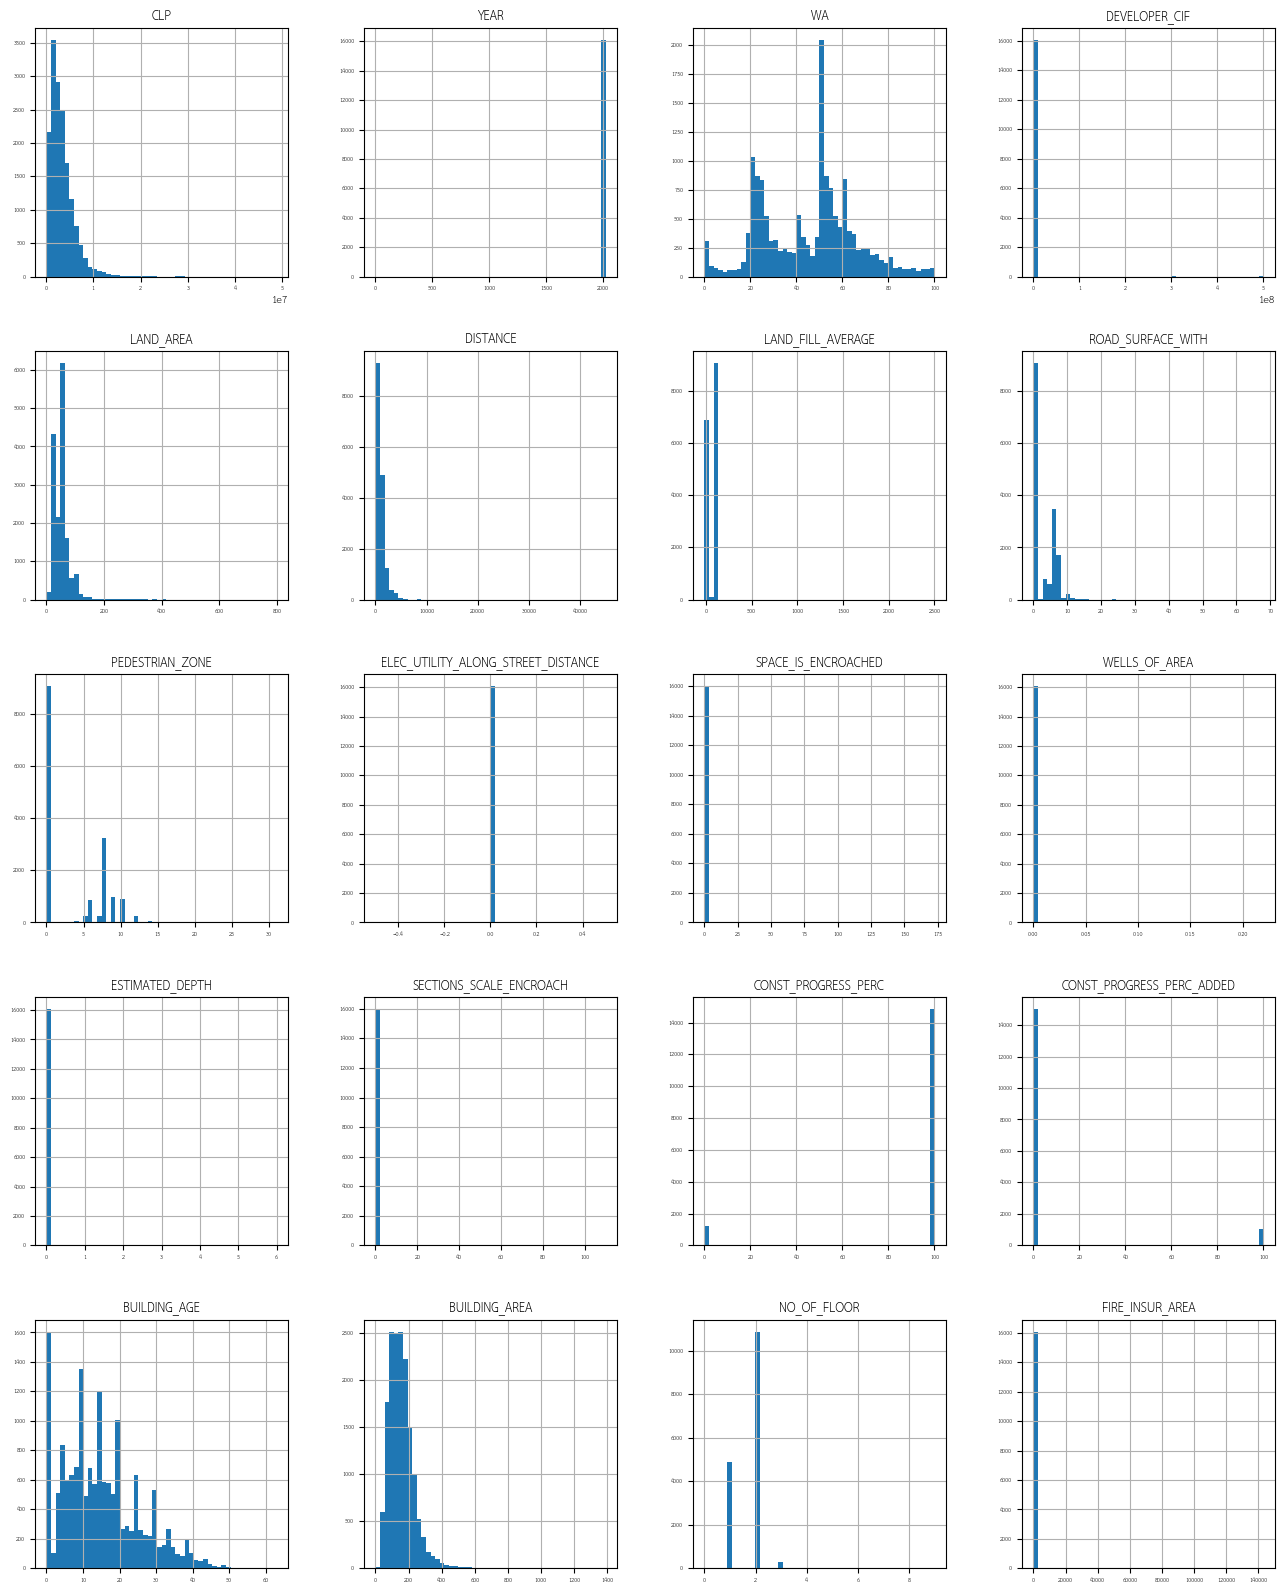

In [21]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=4, ylabelsize=4);

In [22]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [23]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size= 10)

# Data Preprocessing


Deal with categorical and missing features:
Fill with majority and what make sense

In [24]:
# Check for null values in each column
null_counts = df_new.isnull().sum()

# Sort the null_counts Series in descending order
sorted_null_counts = null_counts.sort_values()

# Display the column names and null counts in descending order
print("Column names and null counts in descending order:")
for column, null_count in sorted_null_counts.items():
    print(f"{column}: {null_count}")

Column names and null counts in descending order:
CLP: 0
PU_DRAIN: 0
PU_OTHER: 0
ELEC_UTILITY_ALONG_STREET_DISTANCE: 0
SPACE_IS_ENCROACHED: 0
WELLS_OF_AREA: 0
ESTIMATED_DEPTH: 0
PU_ROAD_LIGHT: 0
LAND_TYPE_DESC: 0
CONST_PROGRESS_PERC: 0
CONST_PROGRESS_PERC_ADDED: 0
BUILDING_AGE: 0
BUILDING_AREA: 0
MODEL_DESC: 0
NO_OF_FLOOR: 0
SECTIONS_SCALE_ENCROACH: 0
PU_WATER: 0
FIRE_INSUR_AREA: 0
LAND_FILL_AVERAGE: 0
BUILDING_STYLE_DESC: 0
PROVINCE_NAME: 0
PU_ELECTRIC: 0
WA: 0
DEVELOPER_CIF: 0
LAND_AREA: 0
DISTANCE: 0
YEAR: 0
DOCUMENT_TYPE_DESC: 0
PEDESTRIAN_ZONE: 0
ROAD_SURFACE_WITH: 0
STRUCTURE_DESC: 1
ROAD_THROUGH_LAND_DESC: 1
CAR_EXIST_DESC: 3
ENTRY_EXIST_DESC: 4
BUILDING_DESC: 5
CONSTRUCTION_TYPE_DESC: 5
RESIDENTIAL_USE: 5
ROOF_DESC: 6
ROOF_FRAME_DESC: 7
WALL_METERIAL_DESC: 7
ROAD_SURFACE_DESC: 7
FLOOR1_DESC: 8
LAND_FILL_DESC: 9
UTILIZATION_OF_BUILDING_DESC: 21
PAINTING_DESC: 38
FENCE_DESC: 57
LOCATE_HIGH_VOLTAGE: 139
FLOOR1_SURFACE_DESC: 156
CAR_NOT_TO_LAND: 197
ELEC_UTILITY_ALONG_STREET: 197
E

In [25]:
df_new.shape

(16086, 53)

In [26]:
df_new['FLOOR2_SURFACE_DESC'].fillna('อื่นๆ', inplace=True)
df_new['PAINTING_DESC'].fillna('ไม่ทาสี', inplace=True)
df_new['FLOOR1_SURFACE_DESC'].fillna('อื่นๆ', inplace=True)
df_new['ROAD_SURFACE_DESC'].fillna('อื่นๆ', inplace=True)
df_new.drop(['BUILDING_DESC','UTILIZATION_OF_BUILDING_DESC'], axis=1,inplace=True)
df_new['CONSTRUCTION_TYPE_DESC'].fillna('อื่นๆ', inplace=True)
df_new['LAND_FILL_DESC'].fillna('ถมแล้ว', inplace=True)
df_new['FLOOR2_DESC'].fillna('อื่นๆ', inplace=True)
df_new['FENCE_DESC'].fillna('อื่นๆ', inplace=True)
df_new['ELEC_UTILITY_ALONG_STREET'].fillna('N', inplace=True)
df_new['CAR_NOT_TO_LAND'].fillna('N', inplace=True)
df_new.drop(['EXPROPRIATION_BY_ROYAL_DECREE'], axis=1,inplace=True)
df_new['LOCATE_HIGH_VOLTAGE'].fillna('N', inplace=True)
df_new['STRUCTURE_DESC'].fillna('ตึก', inplace=True)
df_new['ROOF_DESC'].fillna('อื่นๆ', inplace=True)
df_new['WALL_METERIAL_DESC'].fillna('อื่นๆ', inplace=True)
df_new['ROOF_FRAME_DESC'].fillna('อื่นๆ', inplace=True)
df_new.drop(['MODEL_DESC'], axis=1,inplace=True)
df_new['FLOOR1_DESC'].fillna('อื่นๆ', inplace=True)
df_new['RESIDENTIAL_USE'].fillna('Y', inplace=True)

<ipython-input-26-320f3c4932a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['FLOOR2_SURFACE_DESC'].fillna('อื่นๆ', inplace=True)
<ipython-input-26-320f3c4932a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PAINTING_DESC'].fillna('ไม่ทาสี', inplace=True)
<ipython-input-26-320f3c4932a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['FLOOR1_SURFACE_DESC'].fillna('อื่นๆ', inplace=True)
<ipython-input-26-32

In [27]:
# Check for null values in each column
null_counts = df_new.isnull().sum()

# Sort the null_counts Series in descending order
sorted_null_counts = null_counts.sort_values()

# Display the column names and null counts in descending order
print("Column names and null counts in descending order:")
for column, null_count in sorted_null_counts.items():
    print(f"{column}: {null_count}")

Column names and null counts in descending order:
CLP: 0
SPACE_IS_ENCROACHED: 0
WELLS_OF_AREA: 0
ESTIMATED_DEPTH: 0
LAND_TYPE_DESC: 0
SECTIONS_SCALE_ENCROACH: 0
CONST_PROGRESS_PERC: 0
CONST_PROGRESS_PERC_ADDED: 0
RESIDENTIAL_USE: 0
BUILDING_AGE: 0
BUILDING_AREA: 0
STRUCTURE_DESC: 0
NO_OF_FLOOR: 0
ROOF_FRAME_DESC: 0
ROOF_DESC: 0
WALL_METERIAL_DESC: 0
PAINTING_DESC: 0
FLOOR1_DESC: 0
FLOOR1_SURFACE_DESC: 0
FLOOR2_DESC: 0
FLOOR2_SURFACE_DESC: 0
FENCE_DESC: 0
LOCATE_HIGH_VOLTAGE: 0
CONSTRUCTION_TYPE_DESC: 0
CAR_NOT_TO_LAND: 0
ELEC_UTILITY_ALONG_STREET: 0
YEAR: 0
DOCUMENT_TYPE_DESC: 0
BUILDING_STYLE_DESC: 0
PROVINCE_NAME: 0
WA: 0
DEVELOPER_CIF: 0
LAND_AREA: 0
DISTANCE: 0
LAND_FILL_DESC: 0
LAND_FILL_AVERAGE: 0
ROAD_SURFACE_WITH: 0
PEDESTRIAN_ZONE: 0
ROAD_SURFACE_DESC: 0
PU_ELECTRIC: 0
PU_WATER: 0
PU_ROAD_LIGHT: 0
PU_DRAIN: 0
PU_OTHER: 0
ELEC_UTILITY_ALONG_STREET_DISTANCE: 0
FIRE_INSUR_AREA: 0
ROAD_THROUGH_LAND_DESC: 1
CAR_EXIST_DESC: 3
ENTRY_EXIST_DESC: 4


# One-hot encoding

One-hot encoding is a technique used in machine learning and deep learning to represent categorical variables as binary vectors. It is particularly useful when working with categorical data or features that have a nominal relationship (categories with no inherent order).

In [28]:
list(set(df_new.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [29]:

from sklearn.preprocessing import OneHotEncoder

s = (df_new.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['DOCUMENT_TYPE_DESC', 'BUILDING_STYLE_DESC', 'PROVINCE_NAME', 'LAND_FILL_DESC', 'ROAD_THROUGH_LAND_DESC', 'CAR_EXIST_DESC', 'ROAD_SURFACE_DESC', 'PU_ELECTRIC', 'PU_WATER', 'PU_ROAD_LIGHT', 'PU_DRAIN', 'PU_OTHER', 'ENTRY_EXIST_DESC', 'ELEC_UTILITY_ALONG_STREET', 'CAR_NOT_TO_LAND', 'LOCATE_HIGH_VOLTAGE', 'LAND_TYPE_DESC', 'RESIDENTIAL_USE', 'STRUCTURE_DESC', 'ROOF_FRAME_DESC', 'ROOF_DESC', 'WALL_METERIAL_DESC', 'PAINTING_DESC', 'FLOOR1_DESC', 'FLOOR1_SURFACE_DESC', 'FLOOR2_DESC', 'FLOOR2_SURFACE_DESC', 'FENCE_DESC', 'CONSTRUCTION_TYPE_DESC']
No. of. categorical features:  29


In [30]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming dataset_df and object_cols are defined
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_new[object_cols]))
OH_cols.index = df_new.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

df_final = df_new.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


One-hot encodding certain trade-offs, such as increased dimensionality (especially for datasets with a large number of categories) and potential sparsity

In [31]:
print("Full train dataset shape is {}".format(df_final.shape))

Full train dataset shape is (16086, 124)


In [32]:
import matplotlib as mpl

In [33]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [34]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size= 3)

# Training Part

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16086 entries, 4 to 274191
Columns: 124 entries, CLP to CONSTRUCTION_TYPE_DESC_อื่นๆ
dtypes: float64(118), int64(6)
memory usage: 15.3 MB


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [37]:
# Importing required libraries
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df_final is your DataFrame with features and target variable CLP
# Splitting the data into features (X) and target variable (y)
X = df_final.drop('CLP', axis=1)  # Features
y = df_final['CLP']  # Target variable

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_regressor.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 22.579984366291892


In [38]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size= 7)

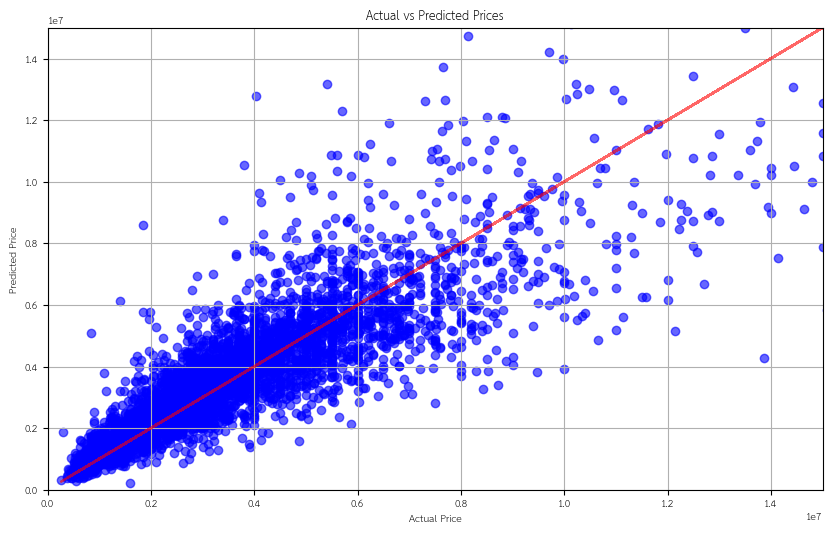

In [39]:
import matplotlib.pyplot as plt

# Create a DataFrame for predicted and actual prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual Price'], results_df['Predicted Price'], color='blue', alpha=0.6)
plt.plot(results_df['Actual Price'], results_df['Actual Price'], color='red', linestyle='--', alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, 15000000)
plt.ylim(0, 15000000)
plt.grid(True)
plt.show()


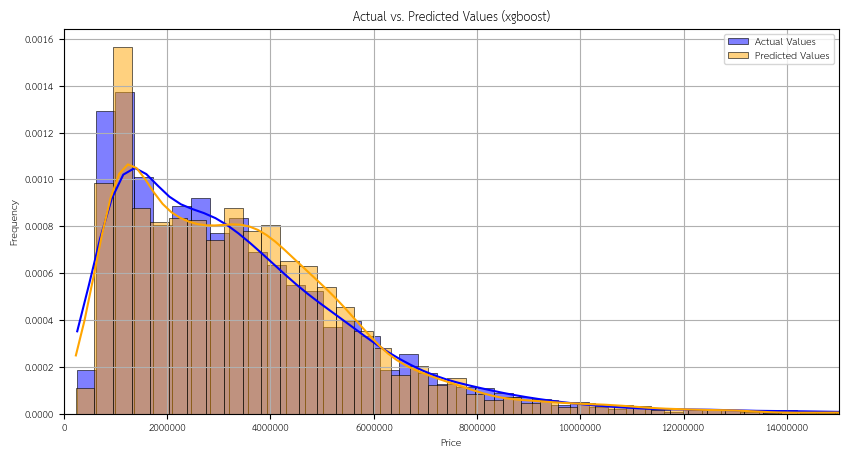

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distributions of actual and predicted values
def plot_distributions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(actual, color='blue', alpha=0.5, label='Actual Values', kde=True, stat='frequency')
    sns.histplot(predicted, color='orange', alpha=0.5, label='Predicted Values', kde=True, stat='frequency')
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 15000000)  # Set x-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions for each model
models = [xgb_regressor]  # Add other models if you have trained them
model_names = ['xgboost']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_distributions(y_test, predictions, model_name)


In [41]:
import matplotlib as mpl

In [42]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [43]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size= 15)

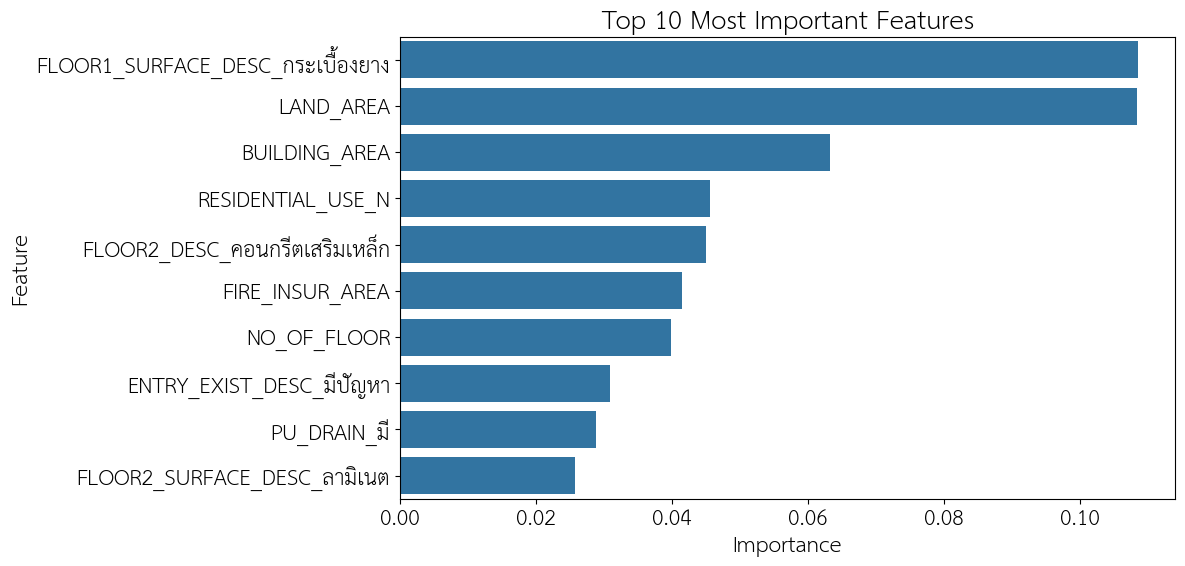

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'xgb' is your XGBoost model
feature_importances = xgb_regressor.feature_importances_

# Get the names of the features
feature_names = X_test.columns  # Assuming X_test is a pandas DataFrame

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Plotting top 10 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()


In [45]:
# Importing required libraries
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df_final is your DataFrame with features and target variable CLP
# Splitting the data into features (X) and target variable (y)
X = df_final.drop('CLP', axis=1)  # Features
y = df_final['CLP']  # Target variable

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN Regressor
knn_regressor = KNeighborsRegressor()

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_regressor.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 32.98748640500527


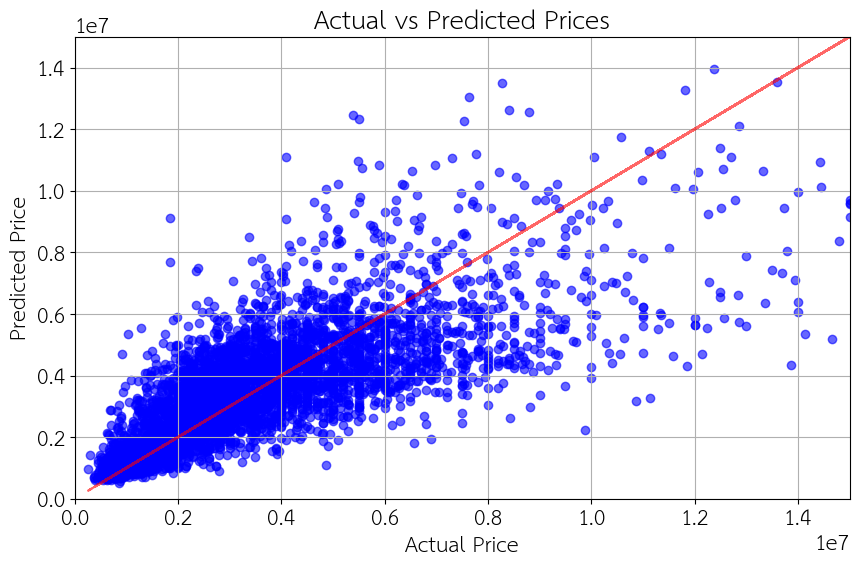

In [46]:
import matplotlib.pyplot as plt

# Create a DataFrame for predicted and actual prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual Price'], results_df['Predicted Price'], color='blue', alpha=0.6)
plt.plot(results_df['Actual Price'], results_df['Actual Price'], color='red', linestyle='--', alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(0, 15000000)
plt.ylim(0, 15000000)
plt.grid(True)
plt.show()


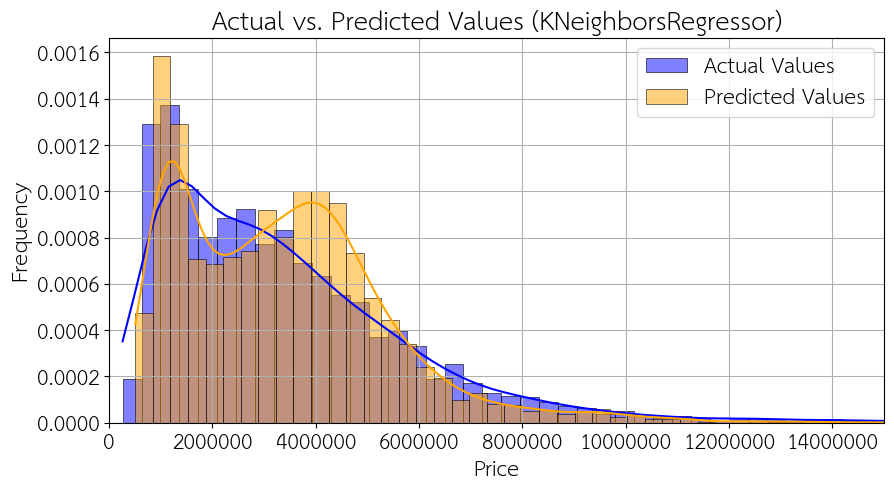

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distributions of actual and predicted values
def plot_distributions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(actual, color='blue', alpha=0.5, label='Actual Values', kde=True, stat='frequency')
    sns.histplot(predicted, color='orange', alpha=0.5, label='Predicted Values', kde=True, stat='frequency')
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 15000000)  # Set x-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions for each model
models = [knn_regressor]  # Add other models if you have trained them
model_names = ['KNeighborsRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_distributions(y_test, predictions, model_name)




In [48]:
# Importing required libraries
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df_final is your DataFrame with features and target variable CLP
# Splitting the data into features (X) and target variable (y)
X = df_final.drop('CLP', axis=1)  # Features
y = df_final['CLP']  # Target variable

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
extra_trees.fit(X_train, y_train)

# Predict on the test data
y_pred = extra_trees.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 22.77%


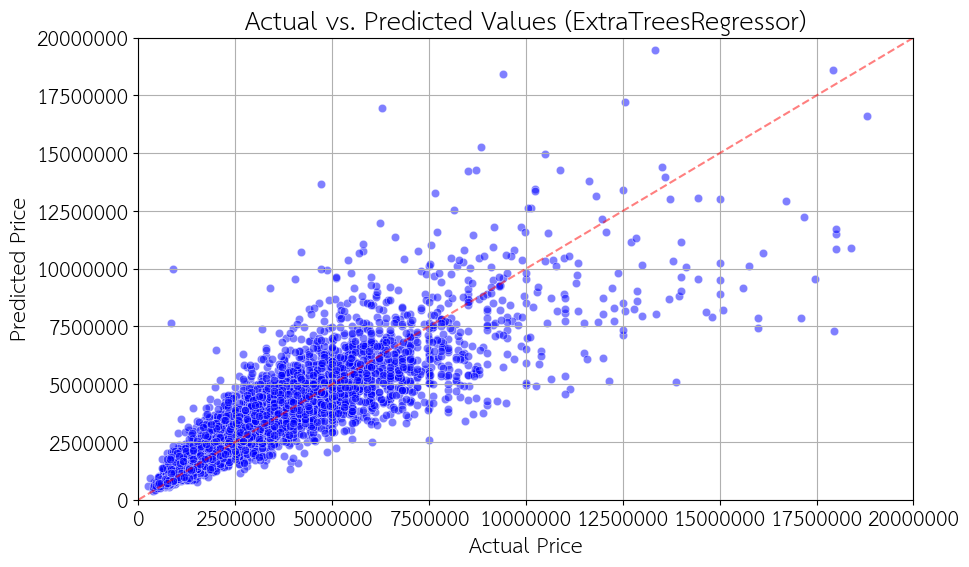

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot scatter plot of actual vs predicted values
def plot_scatter(actual, predicted, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=actual, y=predicted, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.xlim(0, 20000000)  # Set x-axis limits from 0 to 15,000,000
    plt.ylim(0, 20000000)  # Set y-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.plot([0, 20000000], [0, 20000000], color='red', linestyle='--', alpha=0.5)  # Add diagonal line for perfect predictions
    plt.grid(True)
    plt.show()

# Plot scatter plot for each model
models = [extra_trees]  # Add other models if you have trained them
model_names = ['ExtraTreesRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_scatter(y_test, predictions, model_name)


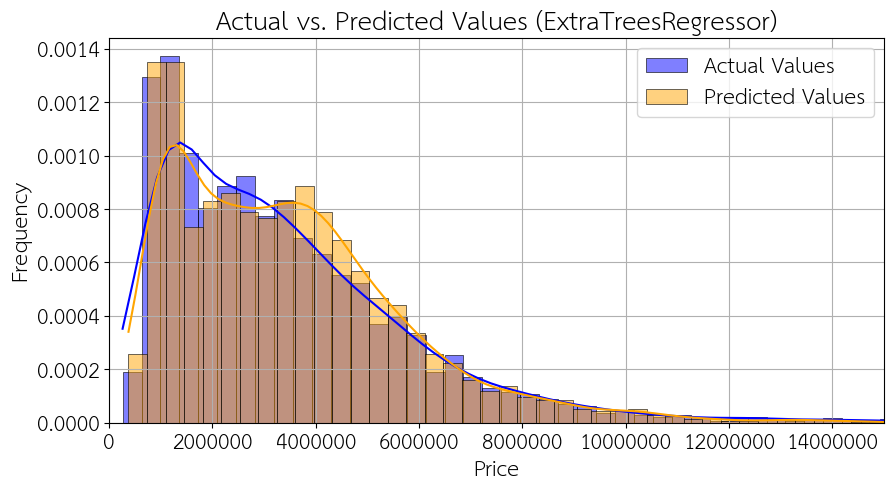

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot distributions of actual and predicted values
def plot_distributions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(actual, color='blue', alpha=0.5, label='Actual Values', kde=True, stat='frequency')
    sns.histplot(predicted, color='orange', alpha=0.5, label='Predicted Values', kde=True, stat='frequency')
    plt.title(f'Actual vs. Predicted Values ({model_name})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.xlim(0, 15000000)  # Set x-axis limits from 0 to 15,000,000
    plt.gca().ticklabel_format(style='plain')  # Set tick labels without scientific notation
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions for each model
models = [extra_trees]  # Add other models if you have trained them
model_names = ['ExtraTreesRegressor']  # Adjust model names accordingly

for model, model_name in zip(models, model_names):
    predictions = model.predict(X_test)
    plot_distributions(y_test, predictions, model_name)




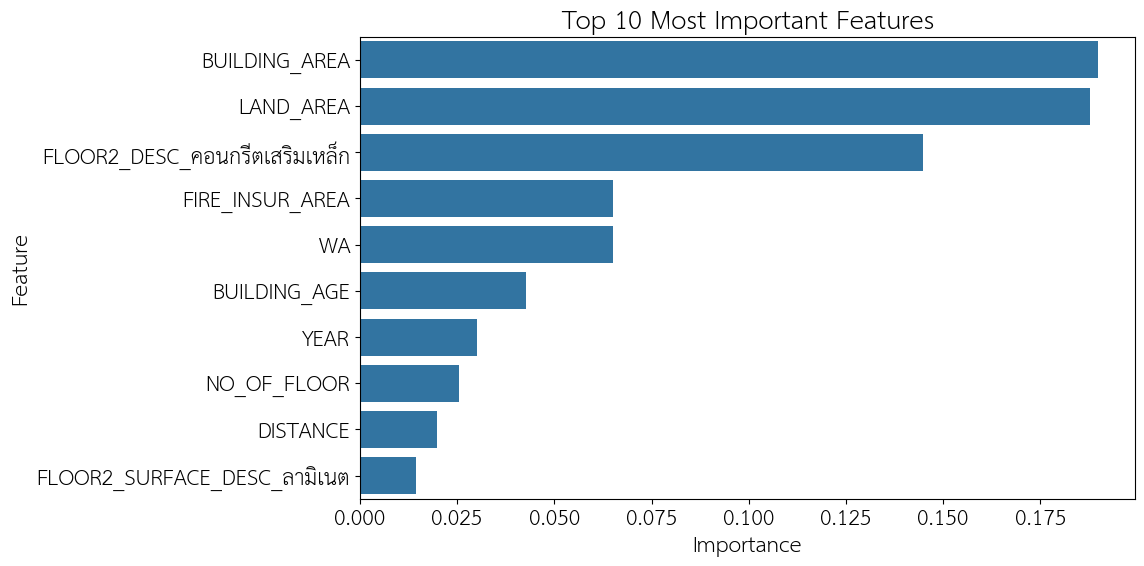

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importances = extra_trees.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Plotting top 10 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()
